# Spotify Sleuthing

Hello there and welcome to my notebook!

We will be performing Exploratory Data Analysis (EDA) on the spotify stats dataset which you can find here: [dataset](https://www.kaggle.com/datasets/meeratif/spotify-most-streamed-artists-of-all-time)

While there aren't any specific problems we've defined to solve, our objective here is to discover any interesting things that exist among artists within a certain threshold of Spotify stream counts. 

Let's kick things off by first preparing our environment by importing the necessary Python modules, reading our .csv file, and viewing the first few rounds of the dataset!

## Table of Contents
[Jump to Discovery](#discovery)

[Jump to Cleaning](#cleaning)

[Jump to Structuring](#structuring)

[Jump to Visualizations](#structuring_vizzes)

[Jump to Summary](#summary)

[Jump to Conclusion](#conclusion)

<a id="discovery"></a>
# Environment Setup and Discovery

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
spotify = pd.read_csv("artists.csv")
spotify.head()

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"


Excellent! Our dataset has been read successfully and we got a glimpse of the first few observations. It's important to understand our variables (columns) and luckily our dataset has documentation explaining its aspects, but for the purposes of this notebook, let's break down each one to better understand them!

* `Artist`: Contains the names of each artist.
* `Streams`: Total count of the artist's songs streamed on Spotify; also aggregate sum of `As lead` and `As feature` columns.
* `Daily`: Average number of streams received on a daily basis.
* `As lead`: Number of streams in which the artist was either the solo or lead artist, and includes `Solo` stream counts.
* `Solo`: Number of streams of an artist's own individual work and excludes collaborative work (features).
* `As feature`: Number of streams where the artist was a featured guest or collaborated with another artist in a supporting role.

Now that we better understand what each column holds, let's view the metadata of our columns.

In [3]:
spotify.shape

(3000, 6)

It's always helpful to know just how large our dataset is and the volume of data that we're going to be working with.

In this case, we're working with 3000 rows across 6 columns.

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   object 
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   object 
 4   Solo        2931 non-null   object 
 5   As feature  2662 non-null   object 
dtypes: float64(1), object(5)
memory usage: 140.8+ KB


In [5]:
spotify.describe(include = "all")

,Artist,Streams,Daily,As lead,Solo,As feature
count,3000,3000,2994.000000,2984,2931,2662
unique,2999,2802,NaN,2819,2733,2231
top,Eve,731.6,NaN,967.9,10.4,0.4
freq,2,4,NaN,3,4,12
mean,NaN,NaN,1.854522,NaN,NaN,NaN
std,NaN,NaN,3.758283,NaN,NaN,NaN
min,NaN,NaN,0.002000,NaN,NaN,NaN
25%,NaN,NaN,0.480250,NaN,NaN,NaN
50%,NaN,NaN,0.871000,NaN,NaN,NaN
75%,NaN,NaN,1.774250,NaN,NaN,NaN


<a id="cleaning"></a>
# Data Cleansing and Transformation

This gave us a lot of insight into our dataset already! We can already see that there are a number of steps we'll need to take in order to prepare our data for calculations and manipulation.

* There seems to be a duplicate in the `Artist` column with the name of "Eve", but we'll need to investigate further to be absolutely sure that it is indeed a duplicate.

* `Streams`, `As lead`, `Solo`, and `As feature` columns are all `object` data types which means they've been encoded as strings by Python. The reason this happened is because the values in these columns contain commas used to separate the thousands place for readability like we are all familiar with. One non-numeric value in these entries caused it to become an `object` data type.

* Another insight derived from this function call is that our dataset contains some null or NA values which means there are missing or blank entries within. We'll need to investigate these missing values further to gain more insights into exactly why they're missing and how that might affect our data overall.

First, let's investigate the possible duplicate observation in the `Artist` column that we gleamed on previously.

In [6]:
spotify[spotify["Artist"] == "Eve"]

,Artist,Streams,Daily,As lead,Solo,As feature
1635,Eve,"1,339.8",0.882,737.7,231.8,602.1
1965,Eve,"1,095.1",0.994,"1,092.8","1,017.9",2.3


This doesn't appear to be a duplicate observation, but rather two separate observations that both have the same artist name. A quick search on Spotify artists results in a handful of artists with the "Eve" handle. The fields or columns for each one are also quite different in terms of their values, so we can safely conclude that these are distinct observations.

Before we start transforming our data into the needed formats, we need to deal with these null values because they could end up causing errors in the transformation process. Let's count the quantity of these null values and isolate these rows to get some more information.

In [7]:
spotify.isna().sum()

Artist          0
Streams         0
Daily           6
As lead        16
Solo           69
As feature    338
dtype: int64

In [8]:
# Creating a boolean mask
mask = spotify.isna().any(axis = 1)
spotify[mask].head(10)

,Artist,Streams,Daily,As lead,Solo,As feature
19,Billie Eilish,"29,173.3",19.313,"29,173.3","25,240.5",NaN
50,Harry Styles,"18,906.5",12.693,"18,906.5","18,906.5",NaN
52,One Direction,"18,720.4",8.746,"18,720.4","18,638.9",NaN
70,Arctic Monkeys,"15,544.5",12.980,"15,544.5","15,544.5",NaN
77,Twenty One Pilots,"14,638.6",4.944,"14,638.6","14,584.0",NaN
87,Red Hot Chili Peppers,"13,261.8",6.860,"13,261.8","13,261.2",NaN
128,Die drei ???,"10,732.1",6.122,"10,732.1","10,707.8",NaN
133,Lil Nas X,"10,529.4",3.622,"10,529.4","5,913.2",NaN
139,AC/DC,"10,124.2",5.824,"10,124.2","10,124.2",NaN
150,Disney,"9,786.7",5.795,NaN,NaN,"9,786.7"


Our results clearly inform us that these missing values are not errors and were left blank intentionally. Some artists don't have any features and primarily do leading work and vice versa. This means that the best course of action here is to simply replace these missing values in the relevant columns with zeroes, so that we can perform our transformations without issue. However, this might not be the case for the `Daily` column, so we should take some extra steps to investigate the 6 missing values within.

In [9]:
spotify[spotify["Daily"].isna()]

,Artist,Streams,Daily,As lead,Solo,As feature
1197,Supertramp,"1,781.0",NaN,"1,781.0","1,778.7",NaN
2080,The Lonely Island,"1,036.3",NaN,"1,007.7",291.2,28.7
2251,Mayday Parade,960.8,NaN,960.8,957.5,NaN
2800,Amon Amarth,778.4,NaN,778.4,771.4,NaN
2813,Tom Waits,776.7,NaN,773.3,769.9,3.3
2946,JayDaYoungan,741.4,NaN,724.3,626.1,17.0


Interesting results here. We know that the `Daily` column is the average number of streams on a daily basis, so that raises the question of why are these values missing? Do these artists' work not receive even a single stream within a day? Doesn't seem possible. The stream counts might be on the lower end of the spectrum, but the numbers are still reasonable. Based on everything so far, we can assume that this can be attributed to either data collection errors, or the inability to compute the daily averages for these particular artists. A good way to know for sure would be to get in contact with the dataset's owner.

Either way, this only affects 6 observations out of 3000 in the `Daily` column which is miniscule enough to simply replace all these missing values with zeroes without significantly impacting our data!

In [10]:
spotify.fillna(0, inplace = True)
spotify.isna().sum()

Artist        0
Streams       0
Daily         0
As lead       0
Solo          0
As feature    0
dtype: int64

Let's start by transforming the columns that need to be a numeric data type like those aforementioned. Since there are four columns that would need to be formatted correctly then converted, we'll create a function to reuse the code instead of repeating ourselves! Our highest value in this dataset would be around 85,000 which we saw earlier, so we only need to worry about removing one comma from these strings.

In [11]:
def comma_remover(series):
    """Takes a Series object and uses .str.replace method to replace first
       instance of a comma, and uses .astype method to cast as float dtype."""
    
    return series.str.replace(",", "").astype("float")

In [12]:
spotify_sub_df = spotify.drop(["Artist", "Daily"], axis = 1).apply(comma_remover, axis = 1)
spotify_sub_df.head()

,Streams,As lead,Solo,As feature
0,85041.3,57252.6,32681.6,27788.7
1,67533.0,40969.6,23073.0,26563.4
2,57859.0,55566.7,50425.7,2292.4
3,53665.2,42673.3,31164.2,10991.9
4,47907.7,42767.9,33917.0,5139.8


What we did here was that we created a subset of the original DataFrame that does not contain the `Artist` or `Daily` columns. We don't need to perform any operations on an artist's name and the `Daily` column is already in the proper format.

Next, we'll need to insert these columns back into our new DataFrame and we'll also check that all columns have been correctly cast to our desired data type.

In [13]:
spotify_sub_df.insert(1, "Daily", spotify["Daily"])
spotify_sub_df.insert(0, "Artist", spotify["Artist"])
spotify_sub_df.head()

,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8


Looking good! However, iterative input validation is always good to practice especially when performing operations that modify DataFrames, so as a precautionary measure, we'll verify that the `Artist` and `Daily` columns across both the original and the new subset DataFrames are equal.

In [14]:
# Verify that Artist and Daily columns are unaffected and retain their original order.
spotify[["Artist", "Daily"]].equals(spotify_sub_df[["Artist", "Daily"]])

True

In [15]:
# Comparing each DataFrames concise summary
print("\nDataFrame 1\n")
print(spotify.info())
print("\nDataFrame 2\n")
print(spotify_sub_df.info())


DataFrame 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   object 
 2   Daily       3000 non-null   float64
 3   As lead     3000 non-null   object 
 4   Solo        3000 non-null   object 
 5   As feature  3000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 140.8+ KB
None

DataFrame 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   float64
 2   Daily       3000 non-null   float64
 3   As lead     2984 non-null   float64
 4   Solo        2931 non-null   float64
 5   As feature  2662 non-null   float64
dtypes: float64(5), object(1)
memory usage: 1

The `.equals` DataFrame method returns `True` if *all* elements are the same in both objects. Our new DataFrame is ready to go for calculations and summaries!

Interestingly, our operations made the missing values repopulate in our second DataFrame, but we'll simply refill these with zeroes once again.

Let's first reassign our original variable containing the DataFrame to a copy of the converted one, then clean up by deleting the second DataFrame as we no longer need it.

In [16]:
spotify = spotify_sub_df.copy(deep = True).fillna(0.0)
spotify.isna().sum()

Artist        0
Streams       0
Daily         0
As lead       0
Solo          0
As feature    0
dtype: int64

In [17]:
# Delete second DataFrame
del spotify_sub_df

In [18]:
spotify.tail()

,Artist,Streams,Daily,As lead,Solo,As feature
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1
2998,Kings of Convenience,728.6,0.252,728.6,618.9,0.0
2999,Ayra Starr,728.6,1.881,418.4,380.8,310.1


<a id="structuring"></a>
# Structuring

Since we know `Streams` is an aggregation of both `As lead` and `As feature`, we can use these to calculate percentages total streams that were only as leads or as features. We can do something similar with the `As lead` and `Solo` columns. Performing these calculations will allow us to view each artists' proportions to view the type of work they more heavily leaned towards.

We need to create some columns to store these percentages.

Note: Percentages and summary statistics such as mean can get troublesome fast. Aggregating percentages across differing sample sizes contributes to two unrelated percentages that then become divided by the total number of samples which leads to inaccurate results. It won't affect us here within this dataset, but it is something to keep in mind when working with percentages especially if we're going to be looking at subsets of our data like we plan to later on.

In [19]:
spotify["% Lead"] = round(spotify["As lead"] / spotify["Streams"] * 100, 1)
spotify["% Feature"] = round(spotify["As feature"] / spotify["Streams"] * 100, 1)
spotify["% Solo"] = round(spotify["Solo"] / spotify["As lead"] * 100, 1)

Let's view the first few rows of our data again and get a summary including those of our newly created columns.

In [20]:
spotify.head()

,Artist,Streams,Daily,As lead,Solo,As feature,% Lead,% Feature,% Solo
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7,67.3,32.7,57.1
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4,60.7,39.3,56.3
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4,96.0,4.0,90.7
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9,79.5,20.5,73.0
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8,89.3,10.7,79.3


In [21]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   float64
 2   Daily       3000 non-null   float64
 3   As lead     3000 non-null   float64
 4   Solo        3000 non-null   float64
 5   As feature  3000 non-null   float64
 6   % Lead      3000 non-null   float64
 7   % Feature   3000 non-null   float64
 8   % Solo      2984 non-null   float64
dtypes: float64(8), object(1)
memory usage: 211.1+ KB


Interestingly, one of our newly created columns `% Solo` contains 16 missing values. Let's investigate further!

In [22]:
# Investigate % Solo missing values
spotify[spotify["% Solo"].isna()]

,Artist,Streams,Daily,As lead,Solo,As feature,% Lead,% Feature,% Solo
150,Disney,9786.7,5.795,0.0,0.0,9786.7,0.0,100.0,NaN
387,Ryan Lewis,4923.0,2.200,0.0,0.0,4923.0,0.0,100.0,NaN
903,Silk Sonic,2311.8,1.675,0.0,0.0,2311.8,0.0,100.0,NaN
1201,Die Kita-FrÃ¶sche,1774.9,1.373,0.0,0.0,1774.9,0.0,100.0,NaN
1238,LSD,1718.1,0.622,0.0,0.0,1718.1,0.0,100.0,NaN
1398,Okieriete Onaodowan,1548.0,0.469,0.0,0.0,1548.0,0.0,100.0,NaN
1544,Brendon Urie,1413.0,0.453,0.0,0.0,1413.0,0.0,100.0,NaN
1979,SUGA,1087.4,0.851,0.0,0.0,1087.4,0.0,100.0,NaN
1996,SFR,1079.1,0.377,0.0,0.0,1079.1,0.0,100.0,NaN
2421,Ajaxx,892.4,1.606,0.0,0.0,892.4,0.0,100.0,NaN


Our dataset contains 16 artists that do not have any leading roles which also includes solo work. The null values were produced as a result of our calculation earlier in which these observations all have zeroes in `As lead` and `Solo`. This resulted in dividing 0 by 0 which is a division by zero error and produces null values.

Let's fill these values with 0.0!

In [23]:
spotify.loc[spotify["% Solo"].isna(), "% Solo"] = 0.0

Looks good! Now, let's calculate some general summary statistics for all of our numeric columns.

In [24]:
spotify.describe()

,Streams,Daily,As lead,Solo,As feature,% Lead,% Feature,% Solo
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0000,3000.000000
mean,2914.439967,1.850813,2141.309000,1484.942700,773.132367,75.712367,24.2877,65.846633
std,4826.306507,3.755436,3584.571655,2714.839837,1871.962004,26.662817,26.6628,32.235154
min,728.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,961.200000,0.478750,747.100000,322.875000,27.300000,61.500000,1.8000,41.575000
50%,1459.400000,0.869500,1104.050000,787.050000,229.700000,85.500000,14.5000,75.950000
75%,2680.800000,1.768250,2070.925000,1516.975000,732.625000,98.200000,38.5000,95.625000
max,85041.300000,85.793000,57252.600000,50425.700000,27788.700000,100.000000,100.0000,100.000000


Our new columns provide some interesting information. Rounded, we can see that on average, 76% of artists' work in this dataset is that of a leading role, and 24% are features while 66% of that leading role is entirely solo work meaning that 44% of leading roles actually include other collaborators.

The range of values in our dataset are quite high as we saw previously. Looking at `Streams` alone, the values in quartiles 1 to 3 are relatively close to each other, but afterwards the values skyrocket to a maximum of 85,041! It makes sense in the context of our dataset because it is about musical artists, and the range of success or exposure varies significantly.

Let's visualize this by creating a box plot!

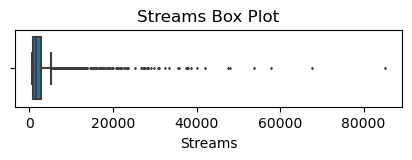

In [25]:
plt.figure(figsize = (5, 1))
sns.boxplot(x = spotify["Streams"], fliersize = 1)
plt.title("Streams Box Plot")
plt.show()

For the purposes of identifying trends in prominent artists or artists with a certain amount of exposure, we will use a subset of our data here. We'll use the condition of having `Streams` greater than quartile 3 + 1.5x the interquartile range which would give us all data points that are considered mild outliers. We will apply this same principle, but using quartile 3 + 3x the interquartile range to gather extreme outliers. Comparing these different thresholds across one another would prove to be quite interesting.

In [26]:
interquartile_range = spotify["Streams"].quantile(q = 0.75) - spotify["Streams"].quantile(q = 0.25)
outside_inner_fence = spotify["Streams"].quantile(q = 0.75) + interquartile_range * 1.5
outside_outer_fence = spotify["Streams"].quantile(q = 0.75) + interquartile_range * 3
print("Interquartile range is {:.1f}, outside inner fence is {:.1f}, and outside outer fence is {:.1f}".format(
    interquartile_range, outside_inner_fence, outside_outer_fence))

Interquartile range is 1719.6, outside inner fence is 5260.2, and outside outer fence is 7839.6


In [27]:
spotify_mild_outliers = spotify[(spotify["Streams"] > outside_inner_fence) & (spotify["Streams"] < outside_outer_fence)]
spotify_mild_outliers.shape

(138, 9)

In [28]:
spotify_extreme_outliers = spotify[spotify["Streams"] > outside_outer_fence]
spotify_extreme_outliers.shape

(221, 9)

This returns two DataFrames with one consisting of 138 rows 9 columns, and the other 221 rows 9 columns. 3 of those 9 columns are the those that we created. Compared to the original DataFrame of 3,000 rows and 6 columns, these new DataFrames are only 4% and 7% respectively in proportion when comparing their number of observations. This further displays just how the artists on the higher end of stream counts only represent a miniscule amount of the overall data. Now that we have a two new filtered DataFrames, we'll call the `describe` method again here for both.

In [29]:
spotify_mild_outliers.describe()

,Streams,Daily,As lead,Solo,As feature,% Lead,% Feature,% Solo
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,6269.802174,4.183043,4580.598551,3353.197101,1689.207246,73.115942,26.884783,66.643478
std,721.079946,3.971624,1609.592783,2211.394100,1542.544131,24.422932,24.423077,31.134943
min,5266.000000,0.755000,151.100000,0.000000,0.000000,2.400000,0.000000,0.000000
25%,5643.525000,2.449000,3511.200000,1289.575000,205.050000,54.150000,3.525000,39.450000
50%,6161.900000,3.112500,4833.650000,3188.300000,1339.950000,79.200000,20.800000,75.200000
75%,6887.025000,4.547000,5664.625000,5246.900000,2961.825000,96.475000,45.850000,95.400000
max,7800.800000,37.826000,7304.800000,7134.900000,6637.100000,100.000000,97.600000,100.000000


The `Streams` min, max, mean, and standard deviation are interesting observations here. The stream values in each observation here are in much closer proximity to one another. The standard deviation is only 721 which is quite low, meaning that the data here is clustered around the mean. A quick glance at the quartiles of the aforementioned column depicts that.

In [30]:
spotify_extreme_outliers.describe()

,Streams,Daily,As lead,Solo,As feature,% Lead,% Feature,% Solo
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,15716.247511,9.392018,10984.333937,7145.465611,4731.914027,70.263801,29.736199,59.143891
std,10711.050826,9.840283,8485.856078,7069.121955,4963.984953,23.502742,23.502742,29.029907
min,7841.800000,1.864000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9195.000000,4.330000,6061.000000,2366.000000,1130.600000,50.300000,9.300000,39.800000
50%,11458.900000,6.237000,8508.000000,5209.400000,3194.800000,73.000000,27.000000,60.800000
75%,17925.900000,11.181000,12291.800000,9380.700000,6854.900000,90.700000,49.700000,86.400000
max,85041.300000,85.793000,57252.600000,50425.700000,27788.700000,100.000000,100.000000,100.000000


What a difference! These range of values are astronomical in comparison to the mild outliers. The average proportions of artists' work remains relatively the same across the entire data and even between the two mild and extreme outlier thresholds we've defined. However, like previously mentioned at the beginning of this section about working with percentages, we cannot correlate all three because the total number of observations are different across our mild and extreme outlier DataFrames when compared to the original DataFrame: 3000 vs (138 and 221) respectively or 359 combined which is only 12% of the original data!

It is however, still an interesting observation.

Now let's grab the median in our dataset to compare average proportions of artists' work over the entire dataset including both the median of the data as well as mild and extreme outliers for the purpose of visualizing the data.

In [31]:
spotify.median(numeric_only = True)

Streams       1459.4000
Daily            0.8695
As lead       1104.0500
Solo           787.0500
As feature     229.7000
% Lead          85.5000
% Feature       14.5000
% Solo          75.9500
dtype: float64

In [32]:
spotify_median = spotify.median(numeric_only = True).values[-3:-1]
spotify_median

array([85.5, 14.5])

<a id="structuring_vizzes"></a>
# Visualizations

After cleaning and restructuring our data, let's create some visualizations to represent the data contained within.

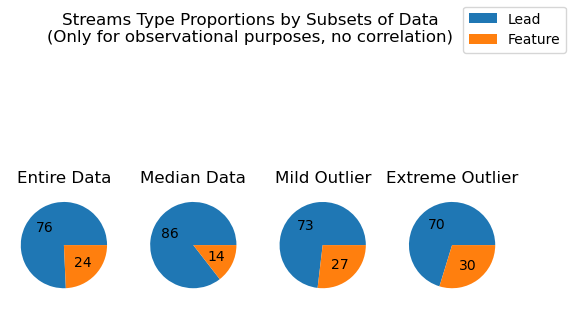

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

fig.suptitle("Streams Type Proportions by Subsets of Data\n(Only for observational purposes, no correlation)")

ax1.pie(spotify[["% Lead", "% Feature"]].mean(),
      autopct = "%.0f"
       )
ax1.set_title("Entire Data")

ax2.pie(spotify_median,
       autopct = "%.0f"
       )
ax2.set_title("Median Data")

ax3.pie(spotify_mild_outliers[["% Lead", "% Feature"]].mean(),
       autopct = "%.0f"
       )
ax3.set_title("Mild Outlier")

ax4.pie(spotify_extreme_outliers[["% Lead", "% Feature"]].mean(),
       autopct = "%.0f"
       )
ax4.set_title("Extreme Outlier")

fig.legend(labels = ["Lead", "Feature"])
plt.show()

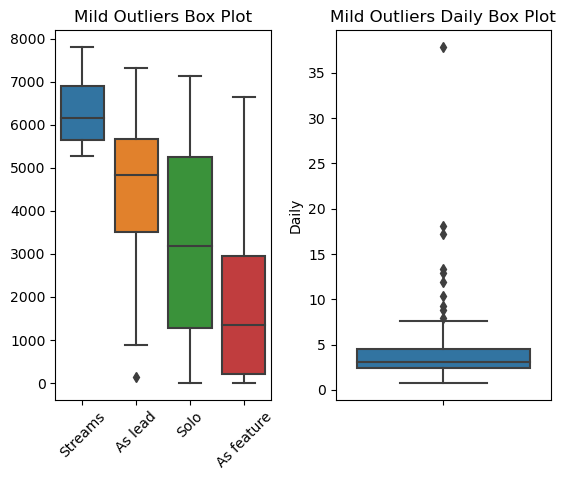

In [34]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=spotify_mild_outliers.drop(["Daily", "% Lead", "% Feature", "% Solo"], axis = 1), showfliers = True, ax=axes[0])
sns.boxplot(data=spotify_mild_outliers, y = "Daily", showfliers = True, ax=axes[1])
axes[0].tick_params(axis = "x", rotation = 45)
axes[0].set_title("Mild Outliers Box Plot")
axes[1].set_title("Mild Outliers Daily Box Plot")
plt.subplots_adjust(wspace = 0.3)
plt.show()

We have a lower outlier in the `As lead` variable. We can also see that `Daily` quartiles 1 and 3 range between 2-4 with quite a number of outliers outside of the upper inner fence. An artist's average number of streams can vary greatly depending on exposure and notoriety, so no particular surprise there.

Let's pull up this outlier!

In [35]:
spotify_mild_outliers[spotify_mild_outliers["As lead"] < 500]

,Artist,Streams,Daily,As lead,Solo,As feature,% Lead,% Feature,% Solo
287,Chencho Corleone,6239.5,4.58,151.1,74.0,6088.4,2.4,97.6,49.0


This is an artist who primarily does featuring roles as the large majority of their stream counts which is particularly interesting because it is atypical for an artist to do so. We've witnessed this firsthand within this dataset.

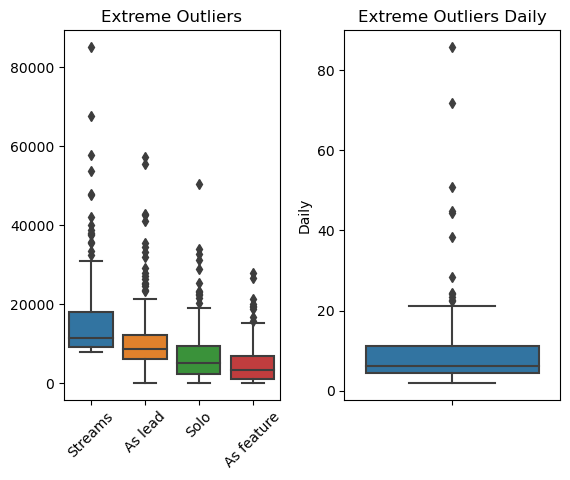

In [36]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(data=spotify_extreme_outliers.drop(["Daily", "% Lead", "% Feature", "% Solo"], axis = 1), showfliers = True, ax=axes[0])
sns.boxplot(data=spotify_extreme_outliers, y = "Daily", showfliers = True, ax=axes[1])
axes[0].tick_params(axis = "x", rotation = 45)
axes[0].set_title("Extreme Outliers")
axes[1].set_title("Extreme Outliers Daily")
axes[1].set_anchor((0, 0))
plt.subplots_adjust(wspace = 0.3)
plt.show()

The outliers in this dataset is staggering even after filtering for extreme outliers! Interestingly, all of the third quartiles for our variables all fall below 20,000! The standard deviations are high and the data is quite spread out.

We also have two extremely high outliers on the upper range of the `Daily` column around 70-85. Let's take a closer look!

In [56]:
# Pulling up top 3 Daily values for comparison
spotify[spotify["Daily"] > 50]

,Artist,Streams,Daily,As lead,Solo,As feature,% Lead,% Feature,% Solo
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7,67.3,32.7,57.1
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4,96.0,4.0,90.7
101,Olivia Rodrigo,12161.1,71.896,12159.0,10909.5,2.1,100.0,0.0,89.7


Two female artists that primarily do solo work have the two highest daily values by quite a large margin compared to the third highest held by Drake. It's an interesting observation.

In [45]:
# Full data for the top 10 artists
spotify.iloc[:10]

,Artist,Streams,Daily,As lead,Solo,As feature,% Lead,% Feature,% Solo
0,Drake,85041.3,50.775,57252.6,32681.6,27788.7,67.3,32.7,57.1
1,Bad Bunny,67533.0,44.820,40969.6,23073.0,26563.4,60.7,39.3,56.3
2,Taylor Swift,57859.0,85.793,55566.7,50425.7,2292.4,96.0,4.0,90.7
3,The Weeknd,53665.2,44.437,42673.3,31164.2,10991.9,79.5,20.5,73.0
4,Ed Sheeran,47907.7,17.506,42767.9,33917.0,5139.8,89.3,10.7,79.3
5,Justin Bieber,47525.7,18.868,27988.0,17183.9,19537.7,58.9,41.1,61.4
6,Eminem,42029.0,20.175,35475.8,21576.7,6553.2,84.4,15.6,60.8
7,Ariana Grande,40111.0,17.158,33219.8,23307.3,6891.2,82.8,17.2,70.2
8,J Balvin,38774.8,11.784,17450.7,5699.8,21324.2,45.0,55.0,32.7
9,Post Malone,38002.7,21.095,34494.0,18943.9,3508.6,90.8,9.2,54.9


In [46]:
# Summary statistics for the top 10 artists
spotify.iloc[:10].describe()

,Streams,Daily,As lead,Solo,As feature,% Lead,% Feature,% Solo
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,51844.940000,33.241100,38785.840000,25797.310000,13059.110000,75.470000,24.530000,63.640000
std,14974.896382,23.142223,11974.486981,12042.468596,9798.546396,16.617798,16.617798,15.816742
min,38002.700000,11.784000,17450.700000,5699.800000,2292.400000,45.000000,4.000000,32.700000
25%,40590.500000,17.846500,33538.350000,19602.100000,5493.150000,62.350000,11.925000,56.500000
50%,47716.700000,20.635000,38222.700000,23190.150000,8941.550000,81.150000,18.850000,61.100000
75%,56810.550000,44.724250,42744.250000,32302.250000,20877.575000,88.075000,37.650000,72.300000
max,85041.300000,85.793000,57252.600000,50425.700000,27788.700000,96.000000,55.000000,90.700000


In [37]:
# Creating subset of data consisting of the top 10 artists
top_10 = spotify.drop(["Daily", "% Lead", "% Feature", "% Solo"], axis = 1).iloc[:10]
top_10

,Artist,Streams,As lead,Solo,As feature
0,Drake,85041.3,57252.6,32681.6,27788.7
1,Bad Bunny,67533.0,40969.6,23073.0,26563.4
2,Taylor Swift,57859.0,55566.7,50425.7,2292.4
3,The Weeknd,53665.2,42673.3,31164.2,10991.9
4,Ed Sheeran,47907.7,42767.9,33917.0,5139.8
5,Justin Bieber,47525.7,27988.0,17183.9,19537.7
6,Eminem,42029.0,35475.8,21576.7,6553.2
7,Ariana Grande,40111.0,33219.8,23307.3,6891.2
8,J Balvin,38774.8,17450.7,5699.8,21324.2
9,Post Malone,38002.7,34494.0,18943.9,3508.6


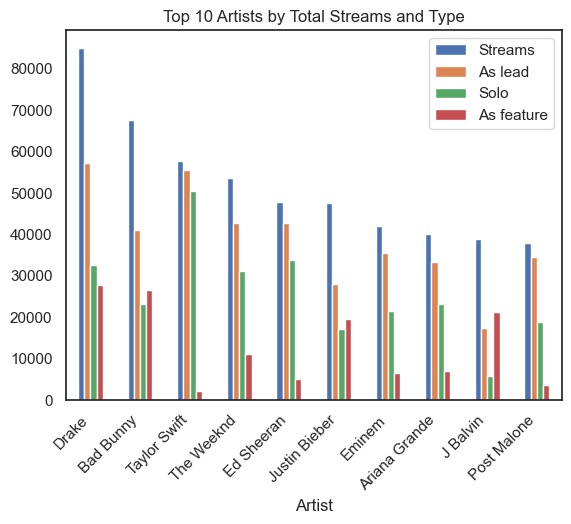

In [40]:
sns.set(style = "white")
top_10.set_index("Artist").plot(kind = "bar")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.title("Top 10 Artists by Total Streams and Type")
plt.show()

We can see from this bar graph that the top 10 artists generally have leading role stream counts that make up close to or over half of their total streams. Features on the other hand are much more spread out and inconsistent across these 10 observations. The proportion of leading roles that are solely an artist's individual work is generally between 50% to 75% with one low outlier (J Balvin) and one high outlier (Taylor Swift).

<a id="summary"></a>
# Summary

To summarize, here are a few key observations:

* The data is extremely unevenly distributed and consists of extreme ranges which is the nature of the profession of a musical artist; exposure and renown are key factors to many of the variables we see here.

* 76% of the artists' work on average within this dataset is that of a leading role which also includes their solo work. On the other hand, 24% are features which is exclusively collaboration with another artist as a supporting role. 66% of those leading roles are purely an artist's individual work with no form of support or collaboration.

* There do not seem to be any ways in which an artist's variables in this dataset could be predicted because there aren't any patterns or trends. The top 10 artists alone have ranges of values across all variables that have a tremendous difference. For example, the daily average number of streams as indicated by the `Daily` column averages around 17 among the top 5-10 artists, but when you introduce the top 4, that average skyrockets to 33.

* Two female solo artists hold the two highest `Daily` values by a margin of almost half that of the third highest daily value.

<a id="conclusion"></a>
# Conclusion

I want to thank you for taking the time to view my notebook and for going through this EDA journey together with me. This data was really quite interesting, and I think it is a unique one simply because of the extreme range of values contained within and that made it pretty fun to work with!

Please feel free to leave any comments or reach out to me directly with any feedback, questions, concerns, and criticisms. I'm always looking to improve my skills, so it would be wonderful to hear what you think!